In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import statistics

sys.path.insert(0, '..') 
from setup.config import *
INPUT_PATH = PROJECT_PATH + OS_PATH_ERROR_ANALYSIS_PROBABILITIES
INPUT_FILE = FILENAME_PROBABILITIES_ERROR_ANALYSIS



In [3]:
# Read data from file
probabilities = []
group = []
input_path = os.path.join(INPUT_PATH, INPUT_FILE)

with open(input_path, 'r') as file:
    for line in file:
        line_values = line.strip().split('\t')
        probabilities.append(line_values[:-2])  # Append list of probabilities
        group.append(line_values[-2:])  # Append group

Peak KDE for (1, 1) 113.35698730799996
Mean: 0.003775041613139085
Std.dev: 0.01978138104765601
Peak KDE for (0, 0) 229.20093936702008
Mean: 0.0023853698348893205
Std.dev: 0.010433305924832988
Peak KDE for (0, 1) 170.66868200133578
Mean: 0.0033481850252245382
Std.dev: 0.012255512634225531
Peak KDE for (1, 0) 208.92216864498022
Mean: 0.0025026478290612474
Std.dev: 0.010703137669200285


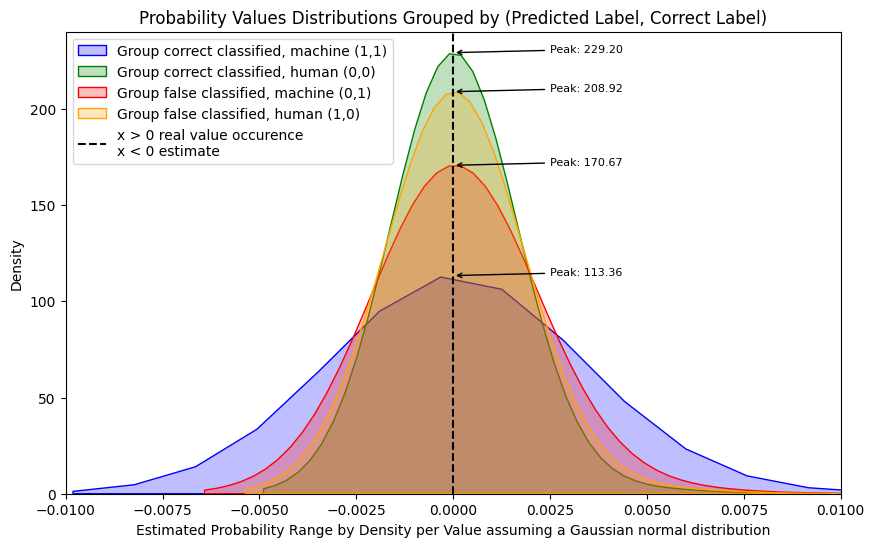

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde


# Convert probabilities to numerical values
probabilities_numeric = [[float(val) for val in sublist] for sublist in probabilities]

# Group probabilities by their last two digits
grouped_probs = {}
for i, grp in enumerate(group):
    last_two_digits = tuple(map(int, grp))
    if last_two_digits not in grouped_probs:
        grouped_probs[last_two_digits] = []
    grouped_probs[last_two_digits].append(probabilities_numeric[i])

# for key, value in grouped_probs.items():
#     print(key, len(value))

# Define colors for different groups
colors = [ 'blue','green','red', 'orange' ]#[ 'blue','red', 'orange', 'green']
groups = ['correct classified, machine (1,1)', 'correct classified, human (0,0)', 'false classified, machine (0,1)', 'false classified, human (1,0)']

# Plot KDE plots for each group
plt.figure(figsize=(10, 6))
for i, (grp, probs) in enumerate(grouped_probs.items()):
    # Flatten the list of probabilities
    flat_probs = np.concatenate(probs[:82])
    kde = gaussian_kde(flat_probs)

    # Evaluate the KDE at specific points
    x = np.linspace(min(flat_probs), max(flat_probs), 100)
    kde_values = kde(x)
    peak = max(kde_values)
    peak_index = np.argmax(kde_values)
    print(f"Peak KDE for {grp}", peak)
    print("Mean:", np.mean(flat_probs))
    print("Std.dev:", statistics.stdev(flat_probs))
    # Create KDE plot using seaborn
    sns.kdeplot(flat_probs, fill=True, label=f'Group {groups[i]}', color=colors[i], bw_adjust=1)
    plt.annotate(f'Peak: {peak:.2f}', xy=(x[peak_index], peak), xytext=(x[peak_index] + 0.0025, peak + 0.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=8)
plt.xlim(-0.01, 0.01) 
plt.axvline(x=0, color='black', linestyle='--', label = 'x > 0 real value occurence\nx < 0 estimate')
plt.title('Probability Values Distributions Grouped by (Predicted Label, Correct Label)')
plt.xlabel('Estimated Probability Range by Density per Value assuming a Gaussian normal distribution')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

In [5]:
def sum_10_lowest_values(list_in):
    total_sum = 0
    log_list = np.log(list_in)
    sorted_list = sorted(log_list)
    scale_factor = 1e10  # Adjust this factor based on the magnitude of your data

    # Scale the data
    scaled_data = [val * scale_factor for val in sorted_list]
    total_sum = sum(scaled_data[:50])
    #total_sum = sum(scaled_data[-15:])

    return total_sum

sums_grp_00 = []
sums_grp_01 = []
sums_grp_10 = []
sums_grp_11 = []
for i, grp in enumerate(group):
    #print(grp)
    if grp == ['0','0']:
        sums_grp_00.append(sum_10_lowest_values(probabilities_numeric[i]))
    if grp == ['0','1']:
        sums_grp_01.append(sum_10_lowest_values(probabilities_numeric[i]))
    if grp == ['1','0']:
        sums_grp_10.append(sum_10_lowest_values(probabilities_numeric[i]))
    if grp == ['1','1']:
        sums_grp_11.append(sum_10_lowest_values(probabilities_numeric[i]))

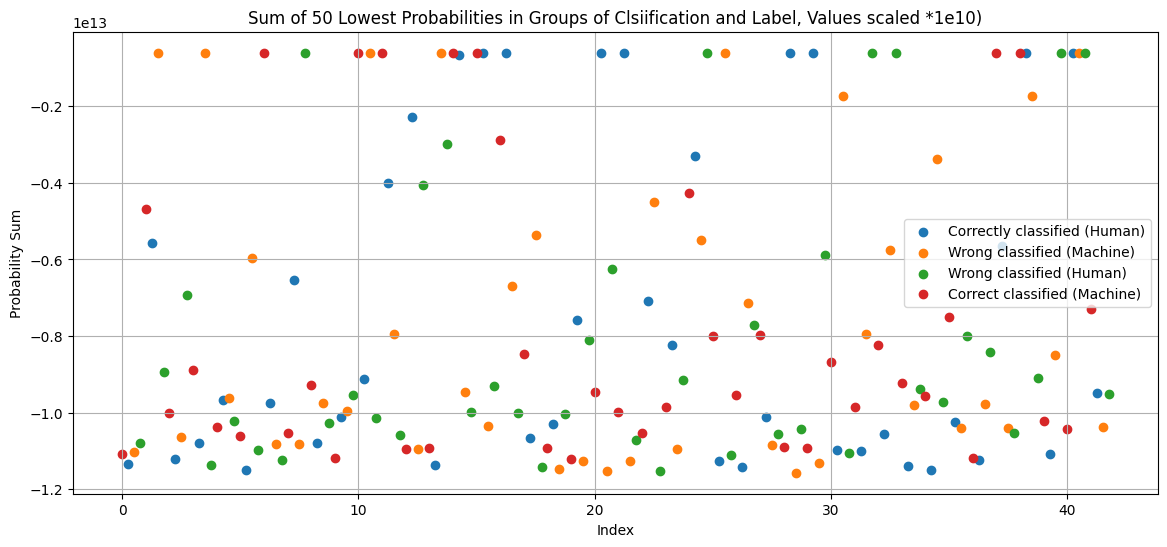

[-11347499308484.531, -5569187653773.874, -11216688754633.615, -10800331340759.377, -9676664957248.98, -11486561811168.416, -9736305457919.709, -6544115292148.261, -10803309856770.75, -10106117467855.576, -9130260684432.436, -4012478618621.284, -2289967843382.893, -11356288375876.346, -658379361348.3643, -606670375754.0836, -606670375754.0836, -10650233682635.992, -10299110633225.977, -7589125152834.102, -606670375754.0836, -606670375754.0836, -7095762733179.645, -8229171721717.37, -3309008773636.1016, -11252821573753.848, -11418690712151.58, -10108192662243.383, -606670375754.0836, -606670375754.0836, -10975917272141.19, -11003163365175.828, -10562489539525.188, -11384852823714.957, -11506288358216.912, -10245448521779.543, -11239052044727.297, -5642994150958.042, -606670375754.0836, -11077479771854.836, -606670375754.0836, -9489277870067.35, -11412782505271.94, -11499647746372.623, -10239198519622.33, -606670375754.0836, -10961805944598.916, -10971034463772.24, -11179970007193.898, -

In [6]:
import matplotlib.pyplot as plt

# Sample data
# data_group1 = sums_grp_00[:82]
# data_group2 = sums_grp_01[:82]
# data_group3 = sums_grp_10[:82]
# data_group4 = sums_grp_11[:82]
data_group1 = sums_grp_00[:42]
data_group2 = sums_grp_01[:42]
data_group3 = sums_grp_10[:42]
data_group4 = sums_grp_11[:42]


# threshold = 0.000002

# #Function to filter outliers
# def filter_outliers(data):
#     return [x for x in data if x <= threshold]
# data_group1 = filter_outliers(data_group1)
# data_group2 = filter_outliers(data_group2)

# data_group3 = filter_outliers(data_group3)

# data_group4 = filter_outliers(data_group4)


# Plotting
plt.figure(figsize=(14,6))

x_group_1 = [x + 0.25 for x in range(42)]
x_group_2 = [x + 0.5 for x in range(42)]
x_group_3 = [x + 0.75 for x in range(42)]

# Scatter plot for each group
plt.scatter(x_group_1, data_group1, label='Correctly classified (Human)')
plt.scatter(x_group_2, data_group2, label='Wrong classified (Machine)')
plt.scatter(x_group_3, data_group3, label='Wrong classified (Human)')
plt.scatter(range(42), data_group4, label='Correct classified (Machine)')

plt.xlabel('Index')
plt.ylabel('Probability Sum')
plt.title('Sum of 50 Lowest Probabilities in Groups of Clsiification and Label, Values scaled *1e10)')
plt.legend()
plt.grid(True)
plt.show()

#print(len(sums_grp_00))
print(sums_grp_00)
print(sums_grp_11)

[0.04989519342780113, 5.036431360849747e-08, 1.3162307368475012e-06, 6.805075947191597e-10, 1.2433035934122927e-08, 8.911199074645992e-06, 2.4871347648058872e-08, 8.796512823705527e-11, 5.0610839963383114e-08, 2.84456085353213e-08, 6.805075947191597e-10, 2.84456085353213e-08, 4.45314435637556e-05, 2.031620205400486e-09, 2.0978455084197378e-10, 1.787308633538487e-06, 6.654924167293075e-09, 1.2433035934122927e-08, 9.658856470196042e-06, 0.04989519342780113, 8.052563316596206e-06, 6.020629257363908e-07, 8.034015119839921e-10, 4.41585257249244e-09, 0.04989519342780113, 2.0711640900117345e-06, 3.6680272152977977e-09, 1.2616501621209864e-08, 4.406577880367024e-10, 7.504693826376752e-07, 1.787308633538487e-06, 6.654924167293075e-09, 1.3454720146910404e-06, 1.0886288691835944e-05, 6.576409972147701e-10, 1.3454720146910404e-06, 6.042308814357966e-05, 1.9784568427994031e-10, 9.146925578074061e-11, 9.409292545115022e-08, 4.35458960557078e-11, 1.2678254890374774e-08, 6.042308814357966e-05, 1.97845

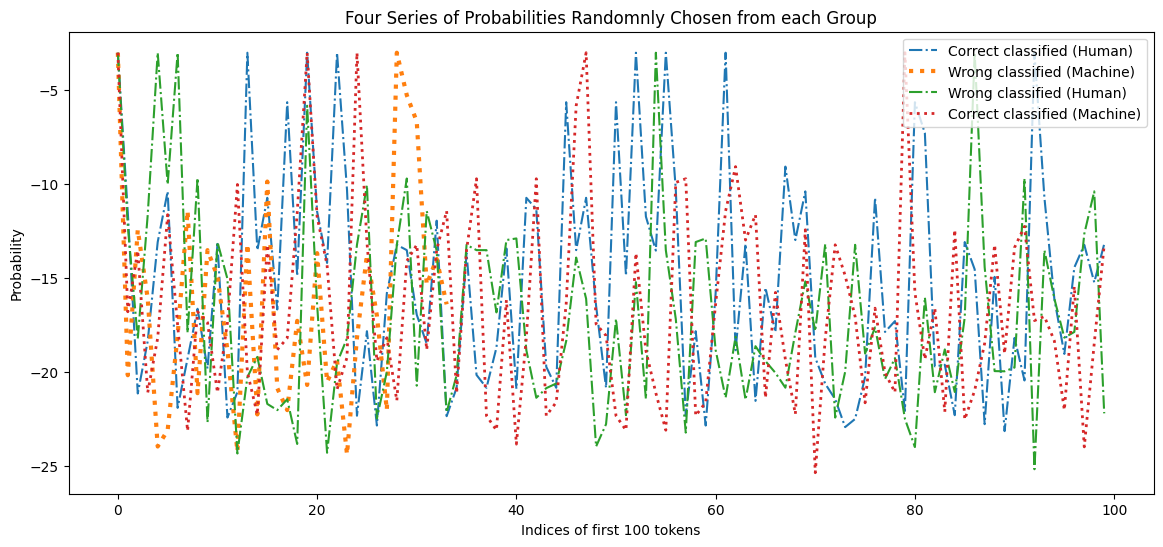

In [20]:
# plot four series
data = []
keys = []
for i, (key, value) in enumerate(grouped_probs.items()):
    data.append(value[i])
    keys.append(key)

print(data[i])

len = 100

plt.figure(figsize=(14,6))
# plt.plot(np.log(data[0][:len]), label='Correct classified (Human)', linestyle = '-.')
# plt.plot(np.log(data[1][:len]), label='Wrong classified (Machine)', linestyle=':', linewidth=3)
# plt.plot(np.log(data[2][:len]), label='Wrong classified (Human)', linestyle = '-.')
# plt.plot(np.log(data[3][:len]), label='Correct classified (Machine)', linestyle=':', linewidth=2)
plt.plot(data[0][:len], label='Correct classified (Human)', linestyle = '-.')
plt.plot(data[1][:len], label='Wrong classified (Machine)', linestyle=':', linewidth=3)
plt.plot(data[2][:len], label='Wrong classified (Human)', linestyle = '-.')
plt.plot(data[3][:len], label='Correct classified (Machine)', linestyle=':', linewidth=2)

print(data_group1[0])

# Add labels and legend
plt.xlabel('Indices of first 100 tokens')
plt.ylabel('Probability')
plt.title('Four Series of Probabilities Randomnly Chosen from each Group')
plt.legend()

# Show the plot
plt.show()